In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error, median_absolute_error, RocCurveDisplay, roc_curve, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram

In [328]:
data = pd.read_csv('countries_of_the_world.csv', sep=",")

FileNotFoundError: [Errno 2] No such file or directory: 'countries_of_the_world.csv'

In [ ]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [ ]:
num_records = data.shape[0]
num_features = len(data.columns.tolist())
print(num_records)
print(num_features)

data_X = data.iloc[:, 1:]

227
20


In [ ]:
print(data.columns.tolist())

['Country', 'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']


In [ ]:
ConvertToFloat = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

for column in ConvertToFloat:
    if data_X[column].dtype == 'object' or data_X[column].dtype == 'string':
        try:
            data_X[column] = data_X[column].astype(float)
        except ValueError:
            # If conversion fails, you can choose to handle it differently
            # For now, let's replace with NaN
            data_X[column] = float('nan')

In [ ]:
le = LabelEncoder()

for column in data_X.columns:
    if data_X[column].dtype == 'object':
        data_X[column] = le.fit_transform(data_X[column])

#wczesniej przekonwertuj ze stringow na liczbe dla kolumn z liczbami

In [ ]:
scaler = StandardScaler()
scaler.fit(data_X)
scaler.transform(data_X)

array([[-1.70711389,  1.15979858,  1.11452932, ...,  1.28840361,
        -0.50108119, -1.31563897],
       [-0.81353621, -0.22890761, -0.42832865, ...,  0.7168884 ,
        -0.97163392, -0.04592061],
       [ 0.08004147,  1.17505909,  1.57280397, ..., -0.23563696,
         1.55223984, -1.62282889],
       ...,
       [-0.21781776,  0.96141198,  0.99232275, ...,  0.08187149,
         1.27418595, -1.21324233],
       [ 0.97361915,  0.64094132,  1.14508096, ...,  0.63221948,
         0.01224907, -0.68077979],
       [ 0.97361915,  0.70198335,  0.82428871, ...,  0.42054717,
        -0.45830366, -0.04592061]])

In [ ]:
data_X.dropna()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,189,185,148,0,136,36,2,5,89,38,15,117,0,192,57,131,53,26
1,3,98,84,23,52,77,61,34,82,188,99,132,61,4,50,99,104,31,88
2,6,190,215,30,3,18,94,45,50,194,127,18,171,0,71,85,59,149,11
3,8,19,13,102,128,62,206,56,118,72,23,86,64,2,107,68,150,155,167
4,10,25,31,48,0,152,102,93,0,149,79,0,185,4,199,125,150,155,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,5,88,58,142,0,135,46,3,140,33,63,93,33,4,145,73,52,72,106
223,6,46,150,1,30,157,220,130,140,214,1,0,208,0,220,201,150,155,34
224,5,176,177,139,26,88,157,3,23,113,88,17,176,0,183,174,74,136,31
225,9,155,187,45,0,88,205,3,67,197,184,3,148,2,178,52,100,77,57


In [ ]:
data_X.head(10)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,189,185,148,0,136,36,2,5,89,38,15,117,0,192,57,131,53,26
1,3,98,84,23,52,77,61,34,82,188,99,132,61,4,50,99,104,31,88
2,6,190,215,30,3,18,94,45,50,194,127,18,171,0,71,85,59,149,11
3,8,19,13,102,128,62,206,56,118,72,23,86,64,2,107,68,150,155,167
4,10,25,31,48,0,152,102,93,0,149,79,0,185,4,199,125,150,155,167
5,9,158,203,208,10,88,47,14,12,185,81,17,181,6,187,64,55,151,5
6,4,5,8,35,129,115,58,58,111,135,0,0,0,2,45,102,29,30,152
7,4,24,28,51,110,80,44,69,88,160,71,135,73,2,69,104,28,45,141
8,4,196,218,39,14,96,31,71,119,61,40,29,114,4,67,157,54,111,75
9,2,92,85,218,0,81,64,28,130,49,67,102,82,5,27,169,107,106,42


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


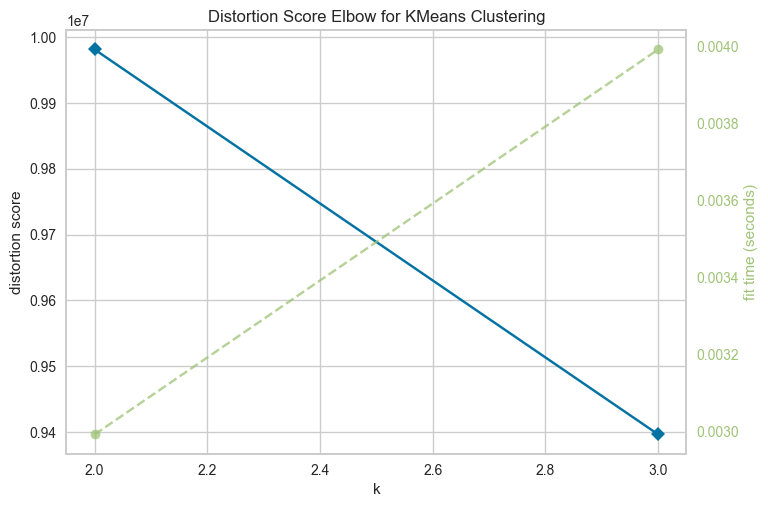

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = KElbowVisualizer(model, k=(3))
visualizer.fit(data_X)
visualizer.show()

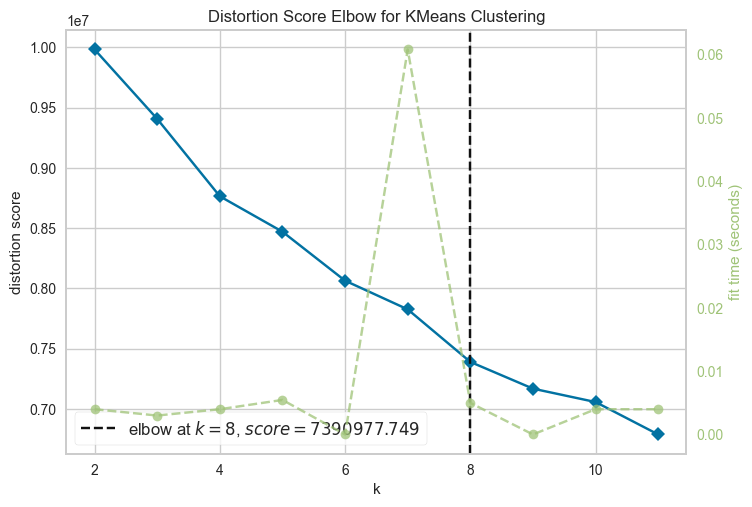

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
modelForCheckedGroups  = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data_X)
# Fit the data to the
visualizer.show()
# Finalize and render the figure

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

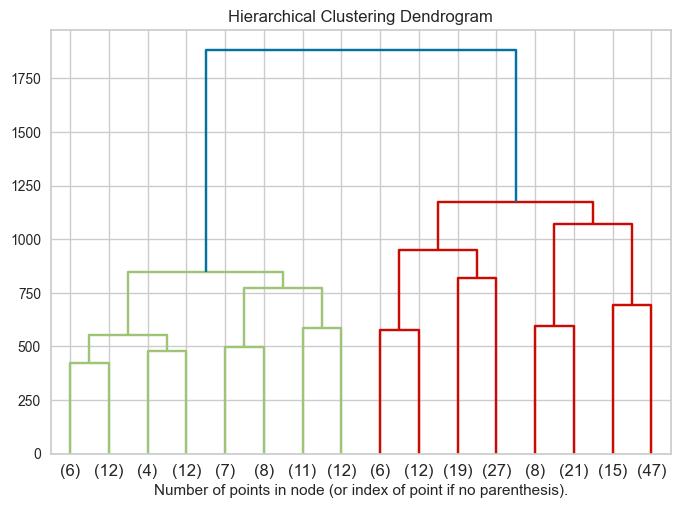

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data_X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()